==============================================================================================

## In this model i.e. Linear Regression model, <br>
***I made a Linear Regression model using the data provided for <br> Prediction of Median value of owner-occupied homes in $'1000' s <br> Using average number of rooms per dwelling***


==============================================================================================

___
__I figured out using the heatmap that I need to use rm__ 
___

* Importing Modules

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
# Assigning Train and test to dataframes 

df_train = pd.read_csv("datasets/Boston_Train.csv")
df_test = pd.read_csv("datasets/Boston_Test.csv")

In [4]:
# Checking for the datatypes of variables in the df_train

df_train.dtypes

Unnamed: 0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad             int64
tax             int64
ptratio       float64
black         float64
lstat         float64
medv          float64
dtype: object

In [5]:
df_train

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352,18.8,364.61,12.67,17.2
347,347,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36,23.1
348,348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
349,349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6


In [6]:
df_train.drop("Unnamed: 0",inplace = True,axis =1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.298187,0.557235,0.129417,0.773321,-0.232369,0.487005,-0.490656,0.140519,0.406203,-0.222599,-0.522173,0.406877,-0.194024
zn,-0.298187,1.000000,-0.461280,-0.060150,-0.453540,0.327331,-0.516954,0.592013,-0.187620,-0.109459,-0.323917,0.141986,-0.384008,0.334885
indus,0.557235,-0.461280,1.000000,0.127674,0.669111,-0.384208,0.525184,-0.594800,0.018118,0.437328,0.101026,-0.311502,0.512586,-0.365981
chas,0.129417,-0.060150,0.127674,1.000000,0.131093,0.037826,0.129274,-0.153217,0.087686,-0.029835,-0.133981,-0.054426,0.062915,0.085798
nox,0.773321,-0.453540,0.669111,0.131093,1.000000,-0.262861,0.667044,-0.719072,0.138287,0.394700,-0.188388,-0.427552,0.488516,-0.247384
rm,-0.232369,0.327331,-0.384208,0.037826,-0.262861,1.000000,-0.179751,0.095919,0.094140,-0.204730,-0.328928,0.166340,-0.680006,0.894837
age,0.487005,-0.516954,0.525184,0.129274,0.667044,-0.179751,1.000000,-0.681234,0.126482,0.266733,0.049163,-0.229513,0.552882,-0.256284
dis,-0.490656,0.592013,-0.594800,-0.153217,-0.719072,0.095919,-0.681234,1.000000,-0.104500,-0.229837,0.023590,0.235331,-0.343134,0.047454
rad,0.140519,-0.187620,0.018118,0.087686,0.138287,0.094140,0.126482,-0.104500,1.000000,0.229822,-0.023634,-0.060212,-0.026626,0.066628
tax,0.406203,-0.109459,0.437328,-0.029835,0.394700,-0.204730,0.266733,-0.229837,0.229822,1.000000,-0.011439,-0.270342,0.240023,-0.286039


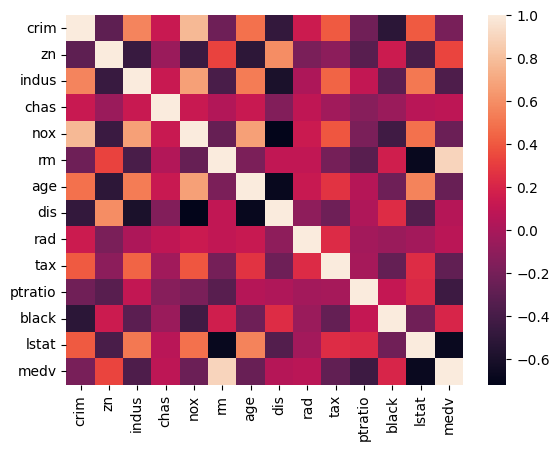

In [7]:
# Creating heat map to check the correlation of variables

sns.heatmap(df_train.corr()) 
df_train.corr()

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     351 non-null    float64
 1   zn       351 non-null    float64
 2   indus    351 non-null    float64
 3   chas     351 non-null    int64  
 4   nox      351 non-null    float64
 5   rm       351 non-null    float64
 6   age      351 non-null    float64
 7   dis      351 non-null    float64
 8   rad      351 non-null    int64  
 9   tax      351 non-null    int64  
 10  ptratio  351 non-null    float64
 11  black    351 non-null    float64
 12  lstat    351 non-null    float64
 13  medv     351 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 38.5 KB


In [9]:
df_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
X =np.array( df_train["rm"] )
y = np.array(df_train["medv"])
X_train = X.reshape(-1,1)

In [11]:
# Importing Linear regression modules for algorithms to be integrated with model 

from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()
ml = lr.fit(X_train,y) # Model declaration

In [13]:
ml.intercept_

-46.62397204400662

In [14]:
ml.coef_

array([11.1942171])

In [15]:
df_test 

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,351,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
1,352,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
2,353,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
3,354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
4,355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
151,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
152,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
153,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [16]:
df_test.drop("Unnamed: 0",inplace = True,axis =1)

In [17]:
df_test.dropna()
df_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
1,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
2,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
3,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
4,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
151,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
152,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
153,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [18]:
df_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
1,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
2,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
3,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
4,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6


In [19]:
X_test =np.array(df_test['rm'] )
y_test =  np.array(df_test["medv"])
X_test

array([6.579, 5.884, 6.728, 5.663, 5.936, 6.212, 6.395, 6.127, 6.112,
       6.398, 6.251, 5.362, 5.803, 8.78 , 3.561, 4.963, 3.863, 4.97 ,
       6.683, 7.016, 6.216, 5.875, 4.906, 4.138, 7.313, 6.649, 6.794,
       6.38 , 6.223, 6.968, 6.545, 5.536, 5.52 , 4.368, 5.277, 4.652,
       5.   , 4.88 , 5.39 , 5.713, 6.051, 5.036, 6.193, 5.887, 6.471,
       6.405, 5.747, 5.453, 5.852, 5.987, 6.343, 6.404, 5.349, 5.531,
       5.683, 4.138, 5.608, 5.617, 6.852, 5.757, 6.657, 4.628, 5.155,
       4.519, 6.434, 6.782, 5.304, 5.957, 6.824, 6.411, 6.006, 5.648,
       6.103, 5.565, 5.896, 5.837, 6.202, 6.193, 6.38 , 6.348, 6.833,
       6.425, 6.436, 6.208, 6.629, 6.461, 6.152, 5.935, 5.627, 5.818,
       6.406, 6.219, 6.485, 5.854, 6.459, 6.341, 6.251, 6.185, 6.417,
       6.749, 6.655, 6.297, 7.393, 6.728, 6.525, 5.976, 5.936, 6.301,
       6.081, 6.701, 6.376, 6.317, 6.513, 6.209, 5.759, 5.952, 6.003,
       5.926, 5.713, 6.167, 6.229, 6.437, 6.98 , 5.427, 6.162, 6.484,
       5.304, 6.185,

In [20]:
X_test =(X_test).reshape(-1,1)
X_test

array([[6.579],
       [5.884],
       [6.728],
       [5.663],
       [5.936],
       [6.212],
       [6.395],
       [6.127],
       [6.112],
       [6.398],
       [6.251],
       [5.362],
       [5.803],
       [8.78 ],
       [3.561],
       [4.963],
       [3.863],
       [4.97 ],
       [6.683],
       [7.016],
       [6.216],
       [5.875],
       [4.906],
       [4.138],
       [7.313],
       [6.649],
       [6.794],
       [6.38 ],
       [6.223],
       [6.968],
       [6.545],
       [5.536],
       [5.52 ],
       [4.368],
       [5.277],
       [4.652],
       [5.   ],
       [4.88 ],
       [5.39 ],
       [5.713],
       [6.051],
       [5.036],
       [6.193],
       [5.887],
       [6.471],
       [6.405],
       [5.747],
       [5.453],
       [5.852],
       [5.987],
       [6.343],
       [6.404],
       [5.349],
       [5.531],
       [5.683],
       [4.138],
       [5.608],
       [5.617],
       [6.852],
       [5.757],
       [6.657],
       [4.628],
       [

In [21]:
y_pred = ml.predict(X_test)

In [22]:
y_pred

array([27.02278229, 19.2428014 , 28.69072064, 16.76887942, 19.82490069,
       22.91450461, 24.96304634, 21.96299616, 21.7950829 , 24.99662899,
       23.35107908, 13.39942007, 18.33606982, 51.66125414, -6.76136493,
        8.93292745, -3.38071137,  9.01128697, 28.18698087, 31.91465516,
       22.95928148, 19.14205345,  8.29485707, -0.30230166, 35.23933764,
       27.80637749, 29.42953897, 24.79513308, 23.037641  , 31.37733274,
       26.64217891, 15.34721385, 15.16810637,  2.27236827, 12.44791162,
        5.45152593,  9.34711348,  8.00380743, 13.71285815, 17.32859028,
       21.11223566,  9.7501053 , 22.70181449, 19.27638405, 25.81380684,
       25.07498851, 17.70919366, 14.41809383, 18.88458645, 20.39580576,
       24.38094705, 25.0637943 , 13.25389525, 15.29124276, 16.99276376,
       -0.30230166, 16.15319748, 16.25394543, 30.07880356, 17.82113583,
       27.89593122,  5.18286472, 11.08221713,  3.96269505, 25.39962081,
       29.29520836, 12.75015548, 20.05997925, 29.76536548, 25.14

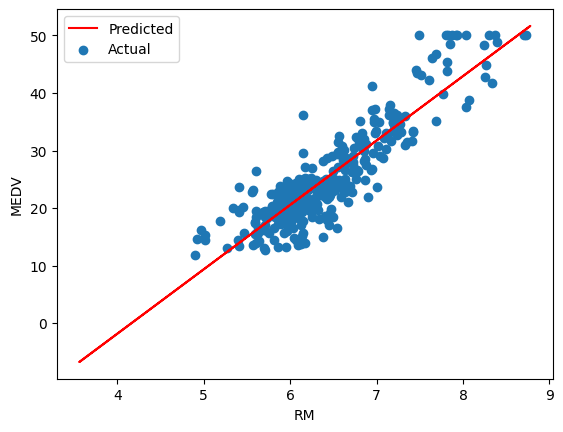

In [23]:
plt.plot(X_test,y_pred,c ='r',label = 'Predicted')
plt.scatter(X,y, label = 'Actual')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()
plt.show()

 * Checking for the errors

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

11.037022061401384

In [25]:
mean_squared_error(y_test, y_pred)

121.81585598386087

In [26]:
mean_absolute_error(y_test, y_pred)

8.372597033187146

In [27]:
r2_score(y_test, y_pred)

-0.8293898494555747

==============================================================================================

## In this model i.e. Polynomial Regression model, <br>
***I made a Polynomial Regression model using the data provided for <br> Prediction of Median value of owner-occupied homes in $'1000' s <br> Using percent lower status of the population***


==============================================================================================

In [28]:
from sklearn.preprocessing import PolynomialFeatures

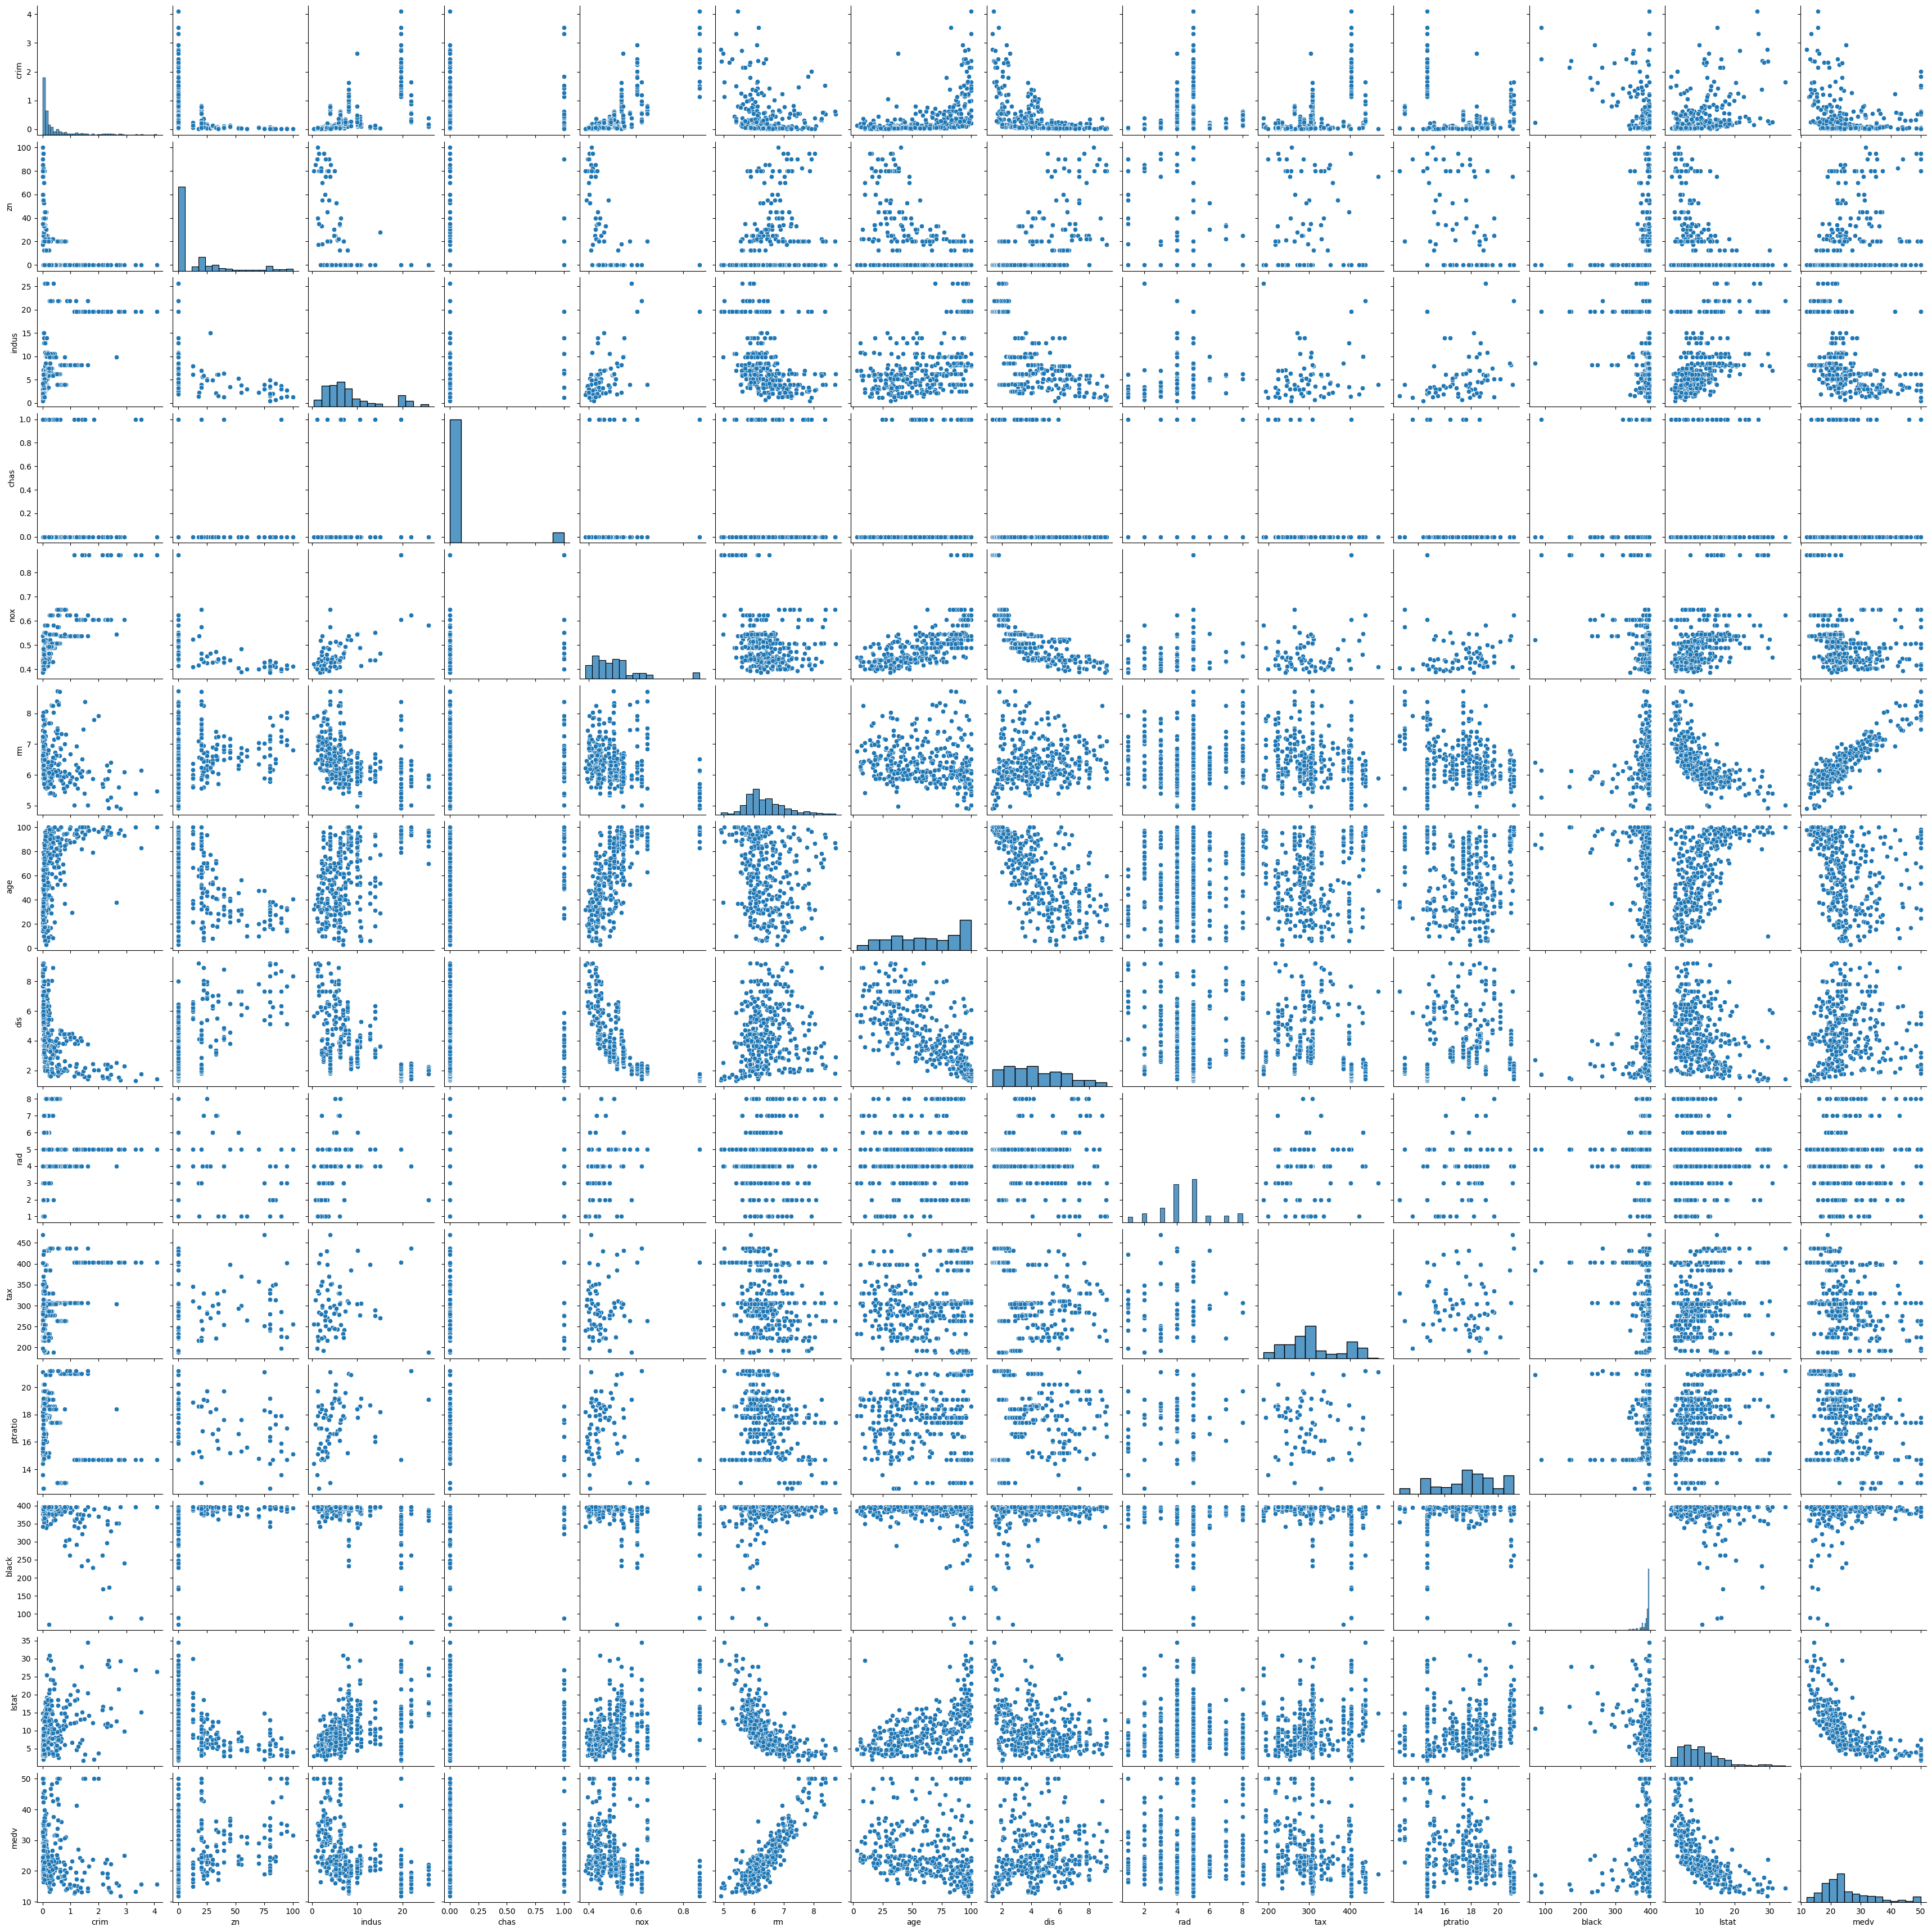

In [29]:
sns.pairplot(df_train)


 - As it is evident from above pairplot that lstat and medv have a polynomial relation


In [30]:
X_train_pr =np.array( df_train['lstat']).reshape(-1,1)
y_train_pr =np.array(df_train['medv'])

X_test_pr =np.array(df_test['lstat']).reshape(-1,1)
y_test_pr =np.array(df_test['medv'])

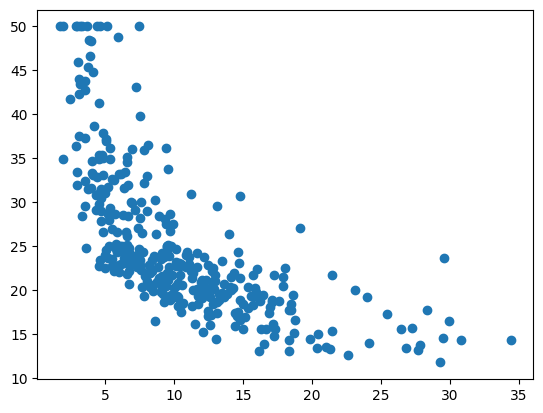

In [31]:
plt.scatter(X_train_pr,y_train_pr)
plt.show()

In [32]:
ply = PolynomialFeatures(degree = 2)

In [33]:
ply

PolynomialFeatures()

In [34]:
ply.fit(X_train_pr)

PolynomialFeatures()

In [35]:
reg_pr = LinearRegression()

In [36]:
X_train_polyreg = ply.transform(np.array(X_train_pr).reshape(-1, 1))
X_test_polyreg = ply.transform(np.array(X_test_pr).reshape(-1, 1))

In [37]:
ml_pr = reg_pr.fit(X_train_polyreg,y_train_pr)

In [38]:
y_pred_pr = ml_pr.predict(X_test_polyreg)

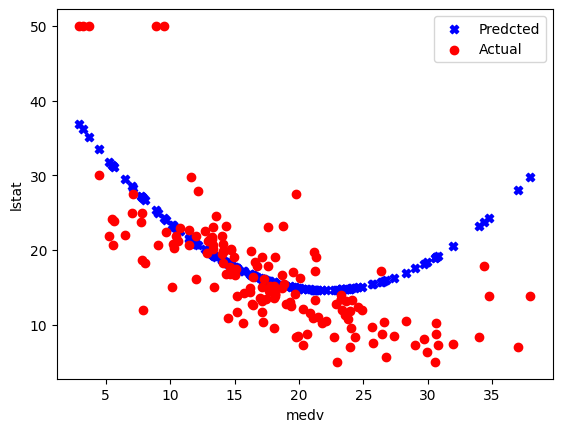

In [39]:
plt.scatter(X_test_pr, y_pred_pr, color = "b",marker="X",label = "Predcted")
plt.scatter(X_test_pr, y_test_pr, color = 'r', label = "Actual")

plt.xlabel("medv")
plt.ylabel("lstat")
plt.legend()
plt.show()

In [40]:
r2_score(y_test_pr, y_pred)

-0.8293898494555747

In [41]:
mean_squared_error(y_test_pr, y_pred)

121.81585598386087

In [42]:
mean_absolute_error(y_test_pr, y_pred)

8.372597033187146

In [43]:
np.sqrt(mean_squared_error(y_test_pr, y_pred))

11.037022061401384

### This is under My contribution to [HacktoberFest](https://hacktoberfest.com)

My Socials


[Github](https://github.com/Aditya-lawate-codez?tab=repositories) <br/>
[LinkedIn](https://www.linkedin.com/in/aditya-lawate/) <br/>
